Exploratory Data Analysis For Measles Vaccinations

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_data = '/content/drive/MyDrive/Measles_Data.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading mcv1 (first does) and mcv2 (second dose) data
mcv1_df = pd.read_excel(file_data, sheet_name='MCV1')
mcv2_df = pd.read_excel(file_data, sheet_name='MCV2')
print("=" * 50)
print("Data loading summary: ")
print(f"MCV1 Dataset: {mcv1_df.shape[0]} countries, {mcv1_df.shape[1]} columns")
print(f"MCV2 Dataset: {mcv2_df.shape[0]} countries, {mcv2_df.shape[1]} columns")
print("=" * 50)
#display a few rows
print("MCV1 Data Sample:")
print(mcv1_df.head(3))
print("\nMCV2 Data Sample:")
print(mcv2_df.head(3))

Data loading summary: 
MCV1 Dataset: 194 countries, 49 columns
MCV2 Dataset: 190 countries, 49 columns
MCV1 Data Sample:
  unicef_region iso3      country vaccine  2024  2023  2022  2021  2020  2019  \
0          ROSA  AFG  Afghanistan    MCV1    55    55    56    51    57    57   
1          ECAR  ALB      Albania    MCV1    81    83    86    87    91    95   
2          MENA  DZA      Algeria    MCV1    94    99    79    79    80    80   

   ...  1989  1988  1987  1986  1985  1984  1983  1982  1981  1980  
0  ...  22.0  34.0  31.0  14.0  14.0  14.0   9.0   8.0   NaN  11.0  
1  ...  96.0  96.0  96.0  96.0  96.0  96.0  96.0  93.0  90.0  90.0  
2  ...  82.0  81.0  73.0  67.0  68.0   NaN   NaN   NaN   NaN   NaN  

[3 rows x 49 columns]

MCV2 Data Sample:
  unicef_region iso3      country vaccine  2024  2023  2022  2021  2020  2019  \
0          ROSA  AFG  Afghanistan    MCV2    44    42  42.0  37.0  38.0  37.0   
1          ECAR  ALB      Albania    MCV2    92    93  93.0  92.0  94.0  9

Exploration

In [ ]:
print("\n" + "=" * 50)
print("Data Structure")
print("=" *50)

#check the columns
print("MCV1 Columns:")
print(mcv1_df.columns.tolist())
print("\nMCV2 Columns:")
print(mcv2_df.columns.tolist())

#year columns
year_cols_mcv1 = [col for col in mcv1_df.columns if str(col).isdigit()]
year_cols_mcv2 = [col for col in mcv2_df.columns if str(col).isdigit()]
print(f"\nMCV1 year range: {min(year_cols_mcv1)} - {max(year_cols_mcv1)}")
print(f"MCV2 year range: {min(year_cols_mcv2)} - {max(year_cols_mcv2)}")

#we will analyze the years that overlap
overlap_years = sorted(set(year_cols_mcv1).intersection(set(year_cols_mcv2)))
print(f"\nOverlapping years for analysis: {len(overlap_years)} years")
print(f"Years: {overlap_years}")



Data Structure
MCV1 Columns:
['unicef_region', 'iso3', 'country', 'vaccine', '2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980']

MCV2 Columns:
['unicef_region', 'iso3', 'country', 'vaccine', '2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980']

MCV1 year range: 1980 - 2024
MCV2 year range: 1980 - 2024

Overlapping years for analysis: 45 years
Years: ['1980', '1981', '1982', '1983'

Data Cleaning and Prep

In [ ]:
print("\n" + "=" * 50)
print("Cleaning and Preaparation")
print("=" * 50)

#check for any missing values
print("\nMCV1 Missing Values in mcv1:")
print(mcv1_df[['unicef_region', 'country', 'iso3']].isnull().sum())
print("\nMCV2 Missing Values in mcv2:")
print(mcv2_df[['unicef_region', 'country', 'iso3']].isnull().sum())

#check for unique regions so we know how many countries are in each
print(f"\nUnique Regions: {mcv1_df['unicef_region'].nunique()}")
print(mcv1_df['unicef_region'].value_counts())

#print total countries, program ones, and nonprogram ones for analysis
print(f"\nTotal Countries in MCV1: {len(mcv1_df)}")
print(f"Program Countries in MCV1: {(mcv1_df['unicef_region'] != 'Non-programme').sum()}")
print(f"Non-program Countries in MCV1: {(mcv1_df['unicef_region'] == 'Non-programme').sum()}")

#making a flag for program vs non-program countries
mcv1_df['is_program'] = mcv1_df['unicef_region'] != 'Non-programme'
mcv2_df['is_program'] = mcv2_df['unicef_region'] != 'Non-programme'

print("\n non-program countries will be kept in the dataset but analyzed separately.")


Cleaning and Preaparation

MCV1 Missing Values in mcv1:
unicef_region    0
country          0
iso3             0
dtype: int64

MCV2 Missing Values in mcv2:
unicef_region    0
country          0
iso3             0
dtype: int64

Unique Regions: 8
unicef_region
Non-programme    41
LACR             32
EAPR             27
WCAR             24
ECAR             21
ESAR             21
MENA             20
ROSA              8
Name: count, dtype: int64

Total Countries in MCV1: 194
Program Countries in MCV1: 153
Non-program Countries in MCV1: 41

 non-program countries will be kept in the dataset but analyzed separately.


Merging the data

In [ ]:
print("\n" + "=" * 50)
print("merging mcv1 and mcv2 data")
print("=" * 50)

#merging on country identifiers
merged_df = mcv1_df.merge(
    mcv2_df,
    on=['iso3', 'country', 'unicef_region'],
    suffixes=('_mcv1', '_mcv2'),
    how='inner'
)

print(f"Merged dataset: {merged_df.shape[0]} countries")
print(f"Counties with both MCV1 and MCV2 data: {merged_df.shape[0]}")


merging mcv1 and mcv2 data
Merged dataset: 190 countries
Counties with both MCV1 and MCV2 data: 190


calculating key metrics

In [ ]:
print("\n" + "=" * 50)
print("calculating the fropout and completion")
print("=" * 50)

#for each year that overlaps, we will calculate the dropout rate
#and the completion rate
#we will make a new dataframe to hold these
metrics_data = []

for year in overlap_years:
    year_str = str(year)
    mcv1_col = f"{year_str}_mcv1"
    mcv2_col = f"{year_str}_mcv2"
    #check if columns exist here
    if mcv1_col in merged_df.columns and mcv2_col in merged_df.columns:
        temp_df = merged_df[['iso3', 'country', 'unicef_region', mcv1_col, mcv2_col]].copy()
        temp_df['year'] = int(year)
        temp_df['mcv1'] = temp_df[mcv1_col]
        temp_df['mcv2'] = temp_df[mcv2_col]

        #calcuating metrics here
        temp_df['dropout_rate'] = np.where(
            (temp_df['mcv1'] > 0) & (temp_df['mcv1'].notna()) & (temp_df['mcv2'].notna()),
            ((temp_df['mcv1'] - temp_df['mcv2']) / temp_df['mcv1']) * 100,
            np.nan
        )
        temp_df['completion_rate'] = np.where(
            (temp_df['mcv1'] > 0) & (temp_df['mcv1'].notna()) & (temp_df['mcv2'].notna()),
            (temp_df['mcv2'] / temp_df['mcv1']) * 100,
            np.nan
        )
        metrics_data.append(temp_df[['iso3', 'country', 'unicef_region', 'year', 'mcv1', 'mcv2', 'dropout_rate', 'completion_rate']])

#combine all the years here
metrics_df = pd.concat(metrics_data, ignore_index=True)

print(f"created the metrics dataset: {len(metrics_df)} observations")
print(f"years covered: {metrics_df['year'].min()} - {metrics_df['year'].max()}")
print("\nSample: ")
print(metrics_df.head(10))
#you will see these values are not calcuated
#yet because in the early years of this dataset
#many countries did not have MCV2 programs


calculating the fropout and completion
created the metrics dataset: 8550 observations
years covered: 1980 - 2024

Sample: 
  iso3              country  unicef_region  year  mcv1  mcv2  dropout_rate  \
0  AFG          Afghanistan           ROSA  1980  11.0   NaN           NaN   
1  ALB              Albania           ECAR  1980  90.0   NaN           NaN   
2  DZA              Algeria           MENA  1980   NaN   NaN           NaN   
3  AND              Andorra  Non-programme  1980   NaN   NaN           NaN   
4  AGO               Angola           ESAR  1980   NaN   NaN           NaN   
5  ATG  Antigua and Barbuda           LACR  1980   NaN   NaN           NaN   
6  ARG            Argentina           LACR  1980  61.0   NaN           NaN   
7  ARM              Armenia           ECAR  1980   NaN   NaN           NaN   
8  AUS            Australia  Non-programme  1980   NaN   NaN           NaN   
9  AUT              Austria  Non-programme  1980   NaN   NaN           NaN   

   completion_rat

Descriptive Stats

In [ ]:
print("\n" + "=" * 50)
print("Descriptive Statistics")
print("=" * 50)

print("\nOverall summary")
print(metrics_df[['mcv1', 'mcv2', 'dropout_rate', 'completion_rate']].describe())

#separate for program and non program
print("\n" + "=" * 50)
print("Program Countries (Unicef supported areas):")
print("=" * 50)
program_df = metrics_df[metrics_df['unicef_region'] != 'Non-programme']
print(program_df[['mcv1', 'mcv2', 'dropout_rate', 'completion_rate']].describe())

print("\n" + "=" * 50)
print("Non-Program Countries:")
print("=" * 50)
non_program_df = metrics_df[metrics_df['unicef_region'] == 'Non-programme']
print(non_program_df[['mcv1', 'mcv2', 'dropout_rate', 'completion_rate']].describe())

print("\n" + "=" * 50)
print("compare: program vs non-program")
print("=" * 50)
print(f"Program avg dropout rate: {program_df['dropout_rate'].mean():.2f}%")
print(f"Non-program avg dropout rate: {non_program_df['dropout_rate'].mean():.2f}%")
print(f"Difference: {program_df['dropout_rate'].mean() - non_program_df['dropout_rate'].mean():.2f}%")


Descriptive Statistics

Overall summary
              mcv1         mcv2  dropout_rate  completion_rate
count  7835.000000  3436.000000   3436.000000      3436.000000
mean     79.618251    82.259895      9.287081        90.712919
std      21.235412    19.260770     19.403624        19.403624
min       1.000000     0.000000   -338.888889         0.000000
25%      70.000000    75.000000      0.000000        86.363636
50%      88.000000    90.000000      4.040404        95.959596
75%      95.000000    96.000000     13.636364       100.000000
max      99.000000    99.000000    100.000000       438.888889

Program Countries (Unicef supported areas):
              mcv1         mcv2  dropout_rate  completion_rate
count  6173.000000  2574.000000   2574.000000      2574.000000
mean     77.072250    79.633644     10.932245        89.067755
std      22.218046    20.941181     21.625164        21.625164
min       1.000000     0.000000   -338.888889         0.000000
25%      65.000000    70.000000 

Time trends

In [ ]:
print("\n" + "=" * 50)
print("Time trends")
print("=" * 50)

#avg dropout rate by year
yearly_trends = metrics_df.groupby('year').agg({
    'dropout_rate': ['mean', 'median', 'std'],
    'completion_rate': ['mean', 'median', 'std'],
    'mcv1': 'mean',
    'mcv2': 'mean'
}).round(3)

print("\nYearly Trends (Global):")
print(yearly_trends)

#regional trends
regional_yearly = metrics_df.groupby(['unicef_region', 'year'])['dropout_rate'].mean().reset_index()
print("\nRegional trends sample:")
print(regional_yearly.head(10))


Time trends

Yearly Trends (Global):
     dropout_rate                completion_rate                    mcv1  \
             mean median     std            mean  median     std    mean   
year                                                                       
1980          NaN    NaN     NaN             NaN     NaN     NaN  43.118   
1981          NaN    NaN     NaN             NaN     NaN     NaN  42.247   
1982          NaN    NaN     NaN             NaN     NaN     NaN  42.222   
1983          NaN    NaN     NaN             NaN     NaN     NaN  46.835   
1984          NaN    NaN     NaN             NaN     NaN     NaN  48.787   
1985          NaN    NaN     NaN             NaN     NaN     NaN  54.245   
1986          NaN    NaN     NaN             NaN     NaN     NaN  59.276   
1987          NaN    NaN     NaN             NaN     NaN     NaN  63.699   
1988          NaN    NaN     NaN             NaN     NaN     NaN  68.140   
1989          NaN    NaN     NaN             NaN  

Patterns and outliers

In [ ]:
print("\n" + "=" * 50)
print("Patterns and outliers")
print("=" * 50)

#countries with highest dropout rates- recently
recent_year = metrics_df['year'].max()
recent_data = metrics_df[metrics_df['year'] == recent_year].copy()

print(f"\nTop 10 countries by dropout rates ({recent_year}):")
top_dropout = recent_data.nlargest(10, 'dropout_rate')[
    ['country', 'unicef_region', 'mcv1', 'mcv2', 'dropout_rate']
]
print(top_dropout)

print(f"Top 10 countries with lowest dropout rates ({recent_year}):")
low_dropout = recent_data.nsmallest(10, 'dropout_rate')[
    ['country', 'unicef_region', 'mcv1', 'mcv2', 'dropout_rate']
]
print(low_dropout)
#You will notice some of these countries have negative dropout rates, indicating more second doses than first doses administered.
#This can happen either due to reporting issues or because some countries have strong catch-up campaigns. For example,
# a country might have a high MCV2 coverage because they are vaccinating older children who missed their first dose earlier.
#This is common in countries with strong immunization programs. This can happen for example if a kid missed
# their first dose after they were born
#but got their second dose upon entering the school system.


Patterns and outliers

Top 10 countries by dropout rates (2024):
                country unicef_region  mcv1  mcv2  dropout_rate
8516            Somalia          ESAR  64.0  32.0     50.000000
8536             Uganda          ESAR  90.0  50.0     44.444444
8366          Argentina          LACR  82.0  46.0     43.902439
8364             Angola          ESAR  53.0  31.0     41.509434
8413  Equatorial Guinea          WCAR  53.0  31.0     41.509434
8489   Papua New Guinea          EAPR  44.0  26.0     40.909091
8447           Kiribati          EAPR  79.0  47.0     40.506329
8481            Nigeria          WCAR  57.0  35.0     38.596491
8465         Mauritania          WCAR  93.0  59.0     36.559140
8399      Cote d'Ivoire          WCAR  75.0  48.0     36.000000
Top 10 countries with lowest dropout rates (2024):
                     country  unicef_region  mcv1  mcv2  dropout_rate
8471              Montenegro           ECAR  23.0  68.0   -195.652174
8370              Azerbaijan           

Covid impact

In [ ]:
print("\n" + "=" * 50)
print("Covid impact")
print("=" * 50)

#comparing pre covid years to post covid
overlap_years = [int(year) if isinstance(year, str) else year for year in overlap_years]
if 2019 in overlap_years:
    pre_covid = metrics_df[metrics_df['year'] == 2019]
    post_covid_years = [y for y in [2020, 2021, 2022, 2023, 2024] if y in overlap_years]

    print(f"Pre-Covid (2019) avg dropout rate: {pre_covid['dropout_rate'].mean():.2f}%")

    for year in post_covid_years:
        year_data = metrics_df[metrics_df['year'] == year]
        print(f"{year} - avg dropout rate: {year_data['dropout_rate'].mean():.2f}%")


Covid impact
Pre-Covid (2019) avg dropout rate: 10.71%
2020 - avg dropout rate: 9.52%
2021 - avg dropout rate: 10.35%
2022 - avg dropout rate: 11.46%
2023 - avg dropout rate: 10.58%
2024 - avg dropout rate: 8.71%


First Visual


creating visualizations

Removed 5124 extreme outliers and missing values


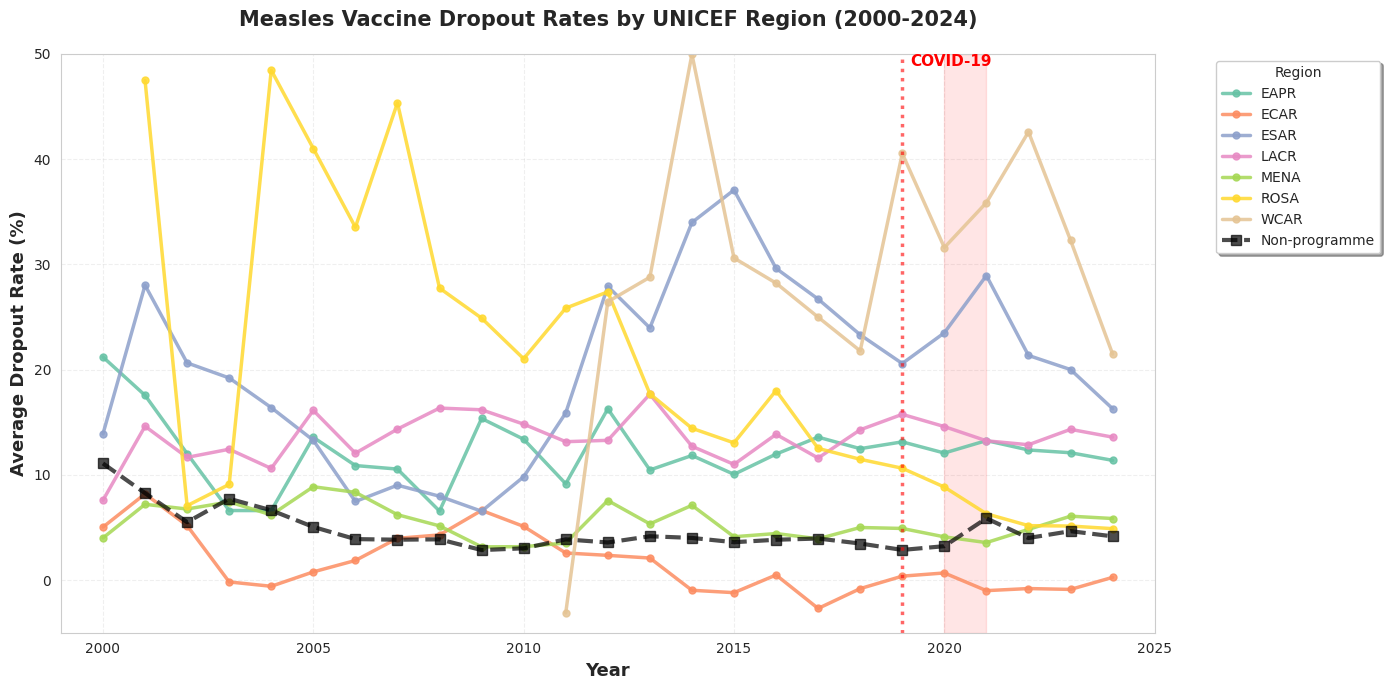

Dropout rate range: -46.88% to 100.00%
Mean dropout rate: 9.76%
Median dropout rate: 4.04%


In [ ]:
print("\n" + "=" * 50)
print("creating visualizations")
print("=" * 50)
#visualizations adapted from matplotlib time series examples
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html

#Remove extreme outliers- kept negative dropout rates that are reasonable
vis_df_clean = metrics_df[
    (metrics_df['dropout_rate'] >= -50) &
    (metrics_df['dropout_rate'] <= 100)
].dropna(subset=['dropout_rate', 'completion_rate']).copy()

print(f"\nRemoved {len(metrics_df) - len(vis_df_clean)} extreme outliers and missing values")

#visualization
plt.figure(figsize=(14, 7))

#color palette
colors = plt.cm.Set2(np.linspace(0, 1, 8))

#program regions
program_regions = sorted([r for r in vis_df_clean['unicef_region'].unique() if r != 'Non-programme'])
for idx, region in enumerate(program_regions):
    region_data = vis_df_clean[vis_df_clean['unicef_region'] == region]
    yearly_avg = region_data.groupby('year')['dropout_rate'].mean().reset_index()

    plt.plot(yearly_avg['year'], yearly_avg['dropout_rate'],
             marker='o', label=region, linewidth=2.5,
             color=colors[idx], markersize=5, alpha=0.85)

#Non-program regions
non_program_data = vis_df_clean[vis_df_clean['unicef_region'] == 'Non-programme']
if len(non_program_data) > 0:
    yearly_avg_non_program = non_program_data.groupby('year')['dropout_rate'].mean().reset_index()
    plt.plot(yearly_avg_non_program['year'], yearly_avg_non_program['dropout_rate'],
             marker='s', label='Non-programme', linewidth=3,
             linestyle='--', color='black', alpha=0.7, markersize=7)

#covid line
plt.axvline(x=2019, color='red', linestyle=':', alpha=0.6, linewidth=2.5)
plt.axvspan(2020, 2021, alpha=0.1, color='red')
plt.text(2019.2, plt.ylim()[1]*0.95, 'COVID-19', color='red',
         fontsize=11, fontweight='bold', va='top')

#format
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Average Dropout Rate (%)', fontsize=13, fontweight='bold')
plt.title('Measles Vaccine Dropout Rates by UNICEF Region (2000-2024)',
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left',
           frameon=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')

#axes
plt.xlim(1999, 2025)
plt.ylim(-5, 50)  # Fixed reasonable limits

plt.tight_layout()
plt.show()

#diagnostics
print(f"Dropout rate range: {vis_df_clean['dropout_rate'].min():.2f}% to {vis_df_clean['dropout_rate'].max():.2f}%")
print(f"Mean dropout rate: {vis_df_clean['dropout_rate'].mean():.2f}%")
print(f"Median dropout rate: {vis_df_clean['dropout_rate'].median():.2f}%")

Visual number 2

/tmp/ipython-input-1194337303.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Program Countries', 'Non-Program'])


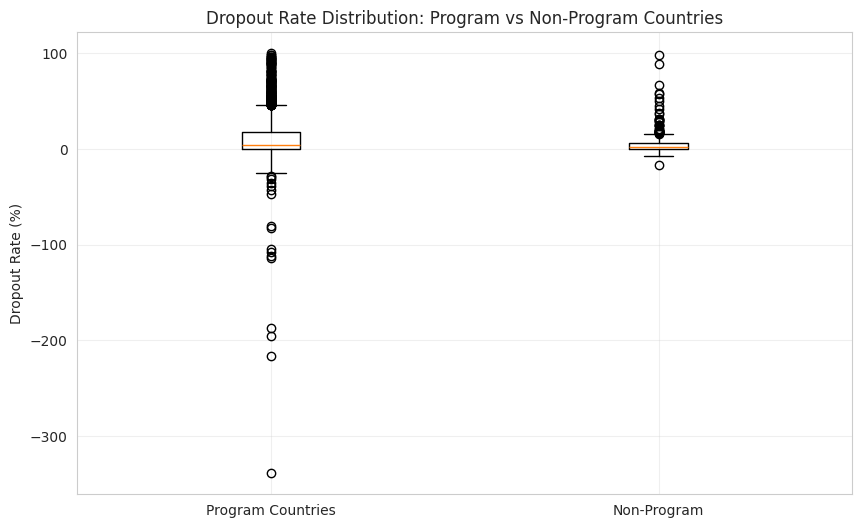

In [ ]:
plt.figure(figsize=(10, 6))
data_to_plot = [
    program_df['dropout_rate'].dropna(),
    non_program_df['dropout_rate'].dropna()
]
plt.boxplot(data_to_plot, labels=['Program Countries', 'Non-Program'])
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rate Distribution: Program vs Non-Program Countries')
plt.grid(True, alpha=0.3)
plt.show()

Visual number 3

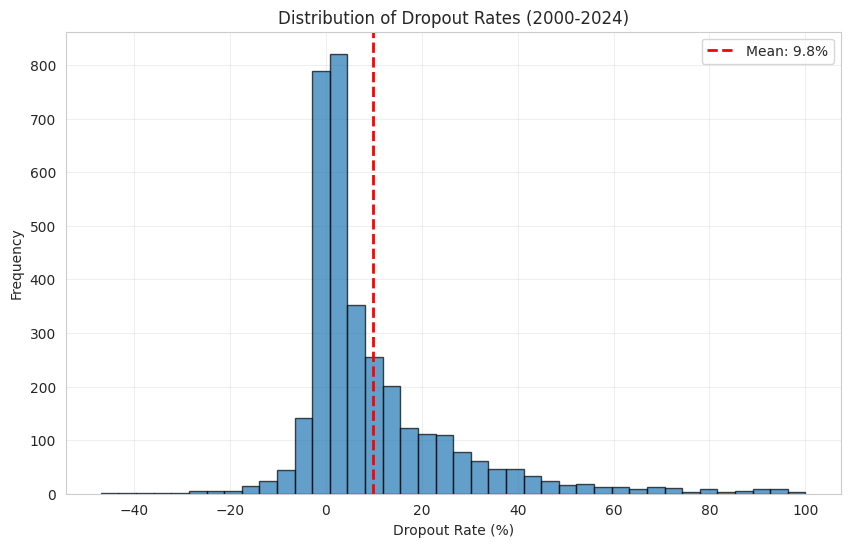

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(vis_df_clean['dropout_rate'], bins=40, edgecolor='black', alpha=0.7)
plt.axvline(vis_df_clean['dropout_rate'].mean(), color='red',
            linestyle='--', linewidth=2, label=f'Mean: {vis_df_clean["dropout_rate"].mean():.1f}%')
plt.xlabel('Dropout Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Dropout Rates (2000-2024)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Visual number 4

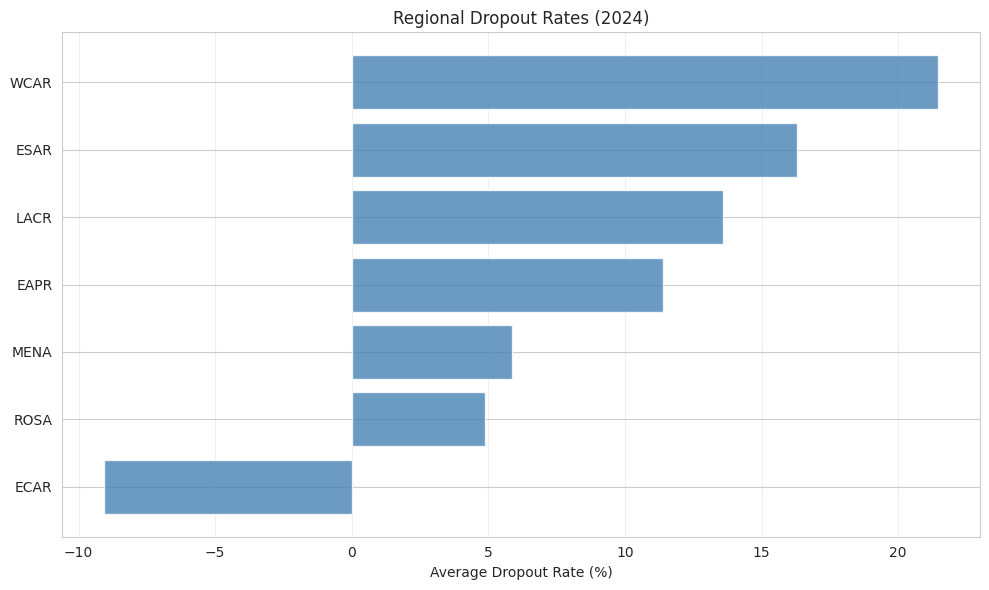

In [ ]:
recent = metrics_df[metrics_df['year'] == 2024].groupby('unicef_region')['dropout_rate'].mean()
recent = recent[recent.index != 'Non-programme'].sort_values()

plt.figure(figsize=(10, 6))
plt.barh(range(len(recent)), recent.values, color='steelblue', alpha=0.8)
plt.yticks(range(len(recent)), recent.index)
plt.xlabel('Average Dropout Rate (%)')
plt.title('Regional Dropout Rates (2024)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

statistical summarry

In [ ]:
print("\n" + "=" * 50)
print("ket findings")
print("=" * 50)

#overall patterns
print("\n1. Overall patterns:")
print(f"- Global average dropout rate: {vis_df_clean['dropout_rate'].mean():.2f}%")
print(f"- Median dropout rate: {vis_df_clean['dropout_rate'].median():.2f}%")
print(f"- Range: {vis_df_clean['dropout_rate'].min():.2f}% to {vis_df_clean['dropout_rate'].max():.2f}%")

# Program vs Non-program
print("\n2. Program vs Non-program Comparison:")
print(f"- Program countries average: {program_df['dropout_rate'].mean():.2f}%")
print(f"- Non-program countries average: {non_program_df['dropout_rate'].mean():.2f}%")
print(f"- Difference: {program_df['dropout_rate'].mean() - non_program_df['dropout_rate'].mean():.2f}%")

#covid impact
pre_covid = vis_df_clean[(vis_df_clean['year'] >= 2015) & (vis_df_clean['year'] <= 2019)]
post_covid = vis_df_clean[(vis_df_clean['year'] >= 2020) & (vis_df_clean['year'] <= 2024)]

print("\n3. Covid Impact:")
print(f"- Pre-COVID average (2015-2019): {pre_covid['dropout_rate'].mean():.2f}%")
print(f"- Post-COVID average (2020-2024): {post_covid['dropout_rate'].mean():.2f}%")
print(f"- Change: {post_covid['dropout_rate'].mean() - pre_covid['dropout_rate'].mean():.2f} percentage points")

#regional patterns
print("\n4. Regional Patterns:")
regional_avg = vis_df_clean.groupby('unicef_region')['dropout_rate'].mean().sort_values(ascending=False)
print(f"- Highest dropout region: {regional_avg.index[0]} ({regional_avg.iloc[0]:.2f}%)")
print(f"- Lowest dropout region: {regional_avg.index[-1]} ({regional_avg.iloc[-1]:.2f}%)")

#Top and bottom countries in 2024
recent_2024 = metrics_df[metrics_df['year'] == 2024].dropna(subset=['dropout_rate'])
top_3 = recent_2024.nlargest(3, 'dropout_rate')[['country', 'dropout_rate']]
bottom_3 = recent_2024.nsmallest(3, 'dropout_rate')[['country', 'dropout_rate']]

print("\n5. 2024 Extremes:")
print("\nTop 3 Highest Dropout:")
for idx, row in top_3.iterrows():
    print(f"- {row['country']}: {row['dropout_rate']:.2f}%")

print("\nTop 3 Lowest Dropout:")
for idx, row in bottom_3.iterrows():
    print(f"- {row['country']}: {row['dropout_rate']:.2f}%")


ket findings

1. Overall patterns:
- Global average dropout rate: 9.76%
- Median dropout rate: 4.04%
- Range: -46.88% to 100.00%

2. Program vs Non-program Comparison:
- Program countries average: 10.93%
- Non-program countries average: 4.37%
- Difference: 6.56%

3. Covid Impact:
- Pre-COVID average (2015-2019): 10.09%
- Post-COVID average (2020-2024): 11.32%
- Change: 1.23 percentage points

4. Regional Patterns:
- Highest dropout region: WCAR (32.25%)
- Lowest dropout region: ECAR (1.58%)

5. 2024 Extremes:

Top 3 Highest Dropout:
- Somalia: 50.00%
- Uganda: 44.44%
- Argentina: 43.90%

Top 3 Lowest Dropout:
- Montenegro: -195.65%
- Azerbaijan: -23.94%
- Albania: -13.58%
